In [1]:
import struct
from matplotlib import pyplot as plt 
import cv2 
import numpy as np

def raw_imread(filename):
    fp = open(filename, 'rb')
    w, = struct.unpack("<i", fp.read(4))
    h, = struct.unpack("<i", fp.read(4))
    print(w,h)
    a = [[struct.unpack("<H", fp.read(2))[0] for i in range(w)] for i in range(h)]
    return np.float32(a)

In [50]:
img = raw_imread("knee.raw")

966 1776


In [55]:
def imshow(img):
    plt.figure(figsize = (30,30))
    plt.imshow(img, cmap='gray')

def imshows(imgs):
    plt.figure(figsize = (50,50))
    for i,img in enumerate(imgs):
        plt.subplot(1,len(imgs),i+1)
        plt.imshow(np.clip(img,a_min=0,a_max=500), cmap='gray')

In [53]:

def f(img, sigma):
    g1 = cv2.getGaussianKernel(19, sigma)
    g = g1 * g1.T
    dst = cv2.filter2D(img, -1, g)
    a = dst
    return a


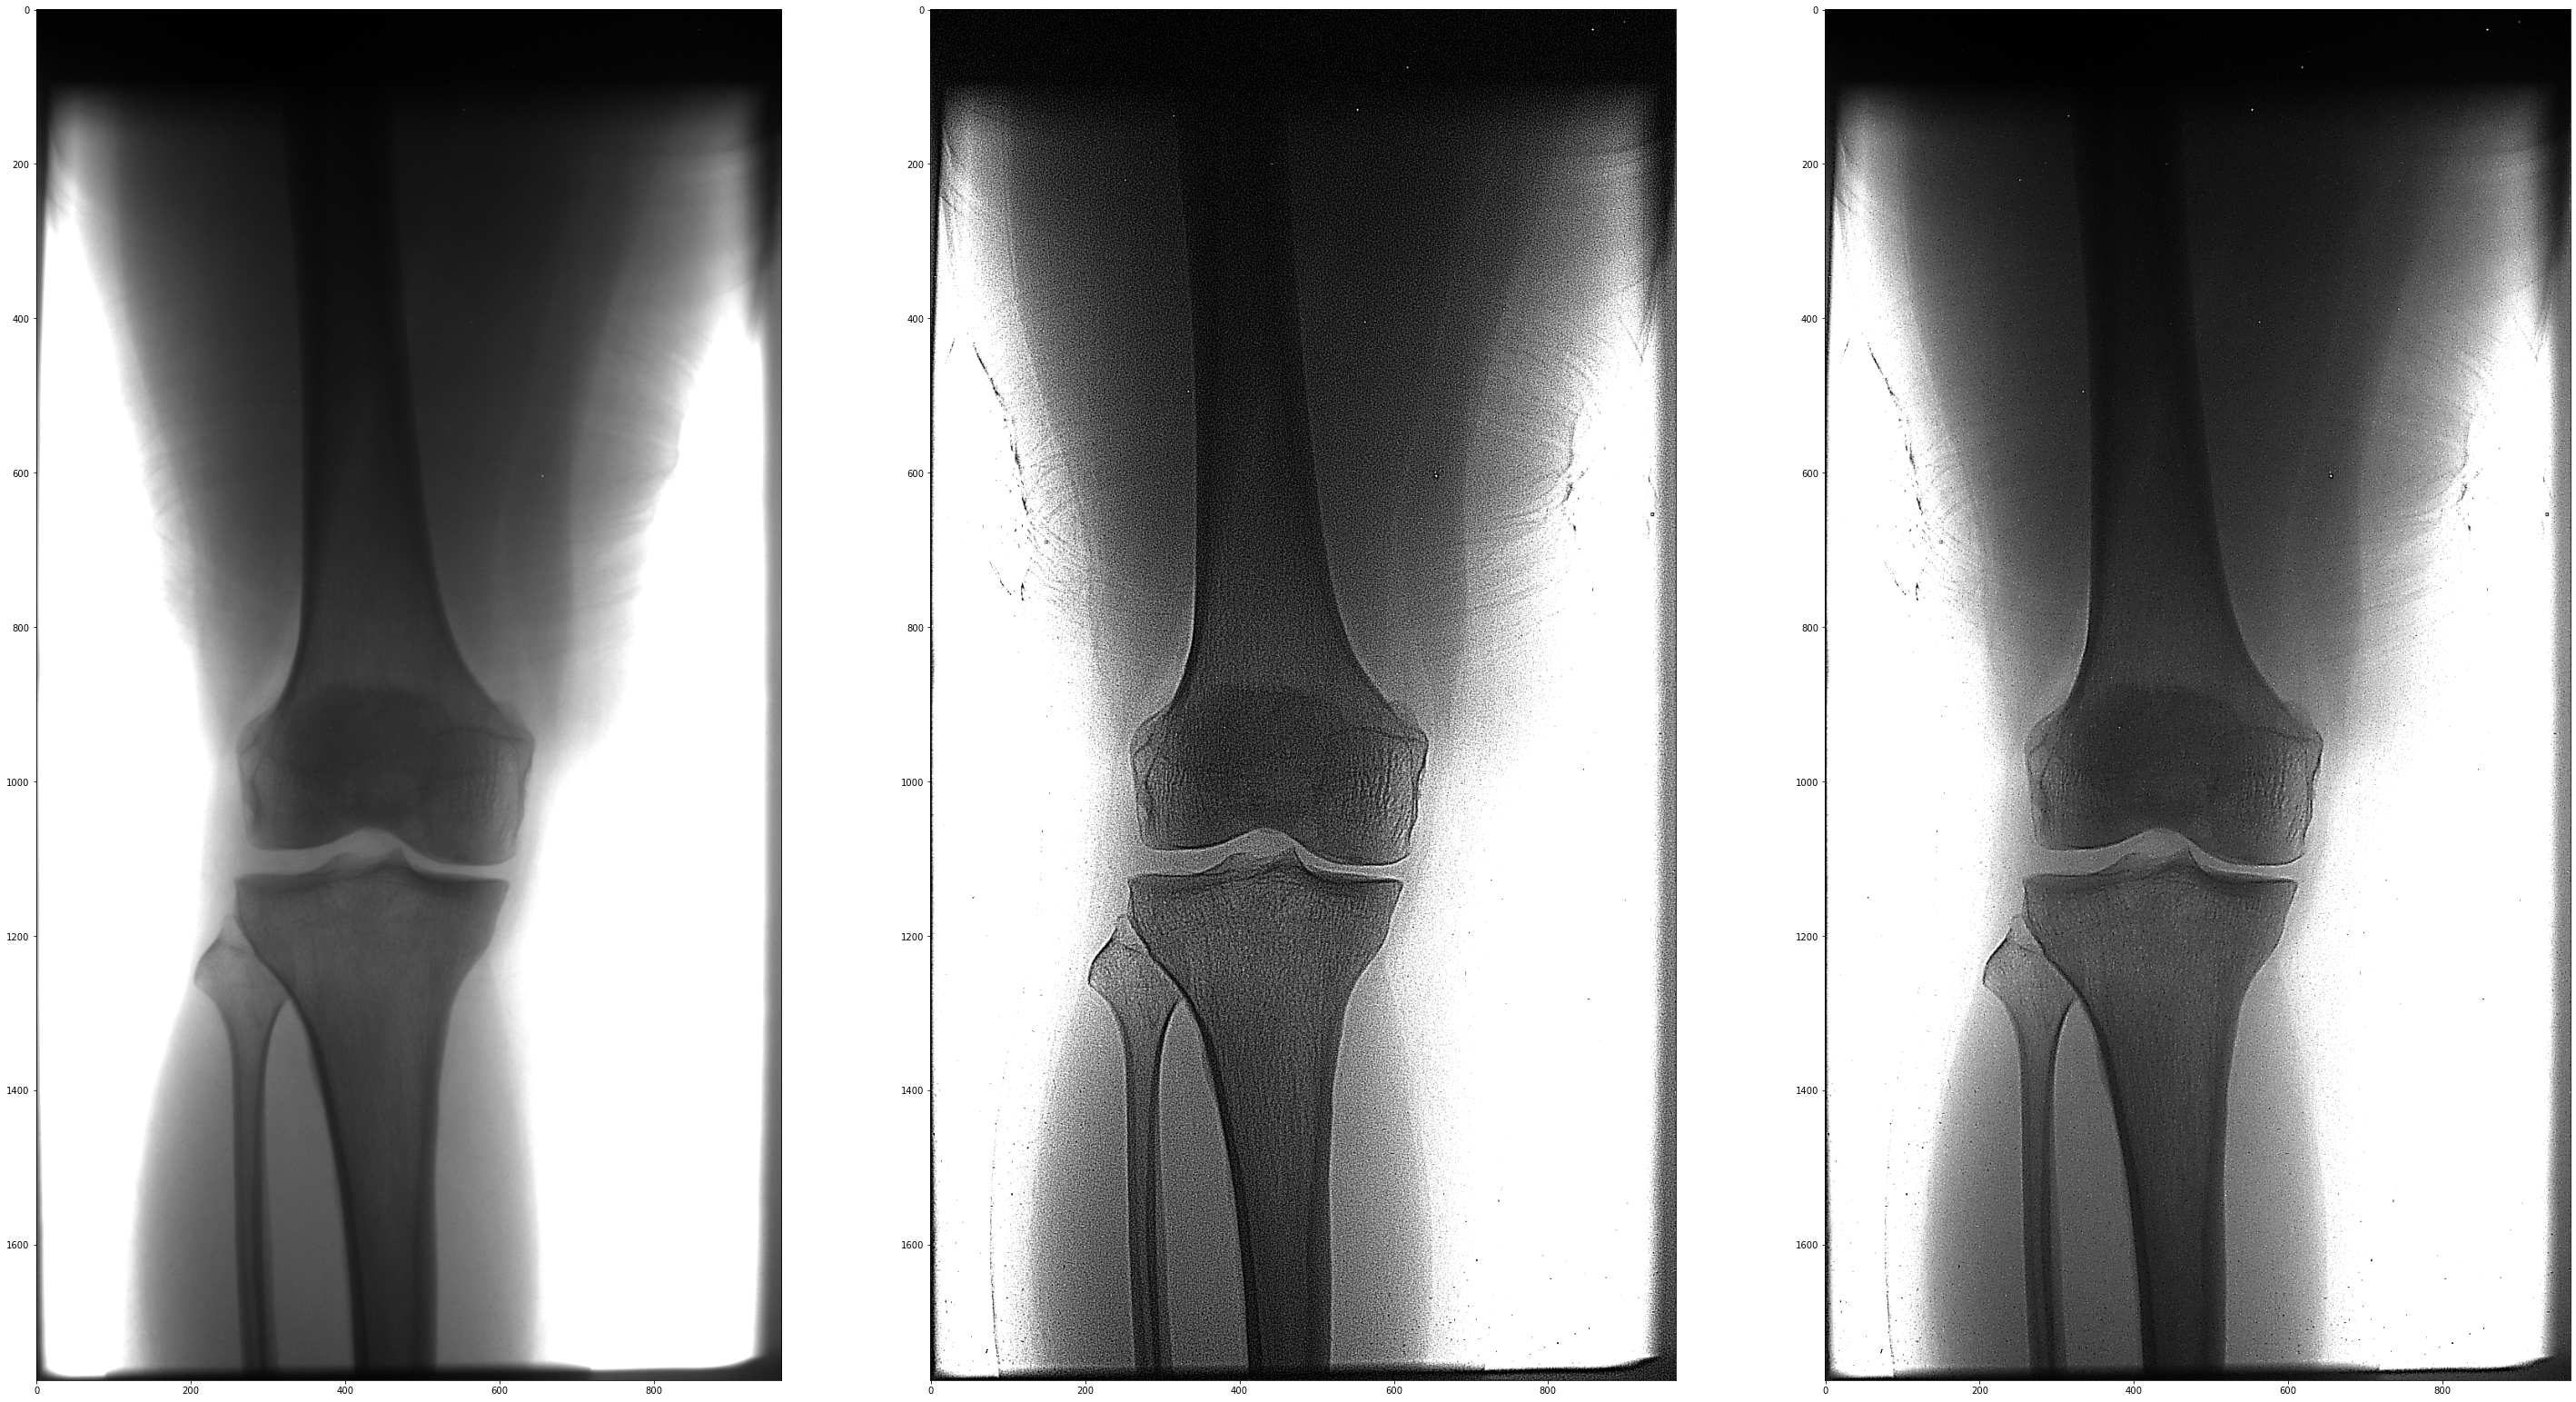

In [94]:
imgb = f(img, 0.7)
imgs = cv2.Laplacian(imgb, cv2.CV_32F, ksize=3)
lim = 12
imgl = np.clip(imgs, a_min = -lim, a_max = lim)
imgy = imgs - imgl
imgr = imgb - 5 * imgy
imgr0 = np.clip(imgb - 5 * imgs, a_min = 0, a_max=4095)
imgr = np.clip(imgr, a_min = 0, a_max=4095)
imshows([img, imgr0, imgr])